In [38]:
#import libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (10,5)

In [39]:
from scipy.optimize import least_squares

In [40]:
def h(theta, x, y):
    return theta[2] * (x - theta[0])**2 + theta[3] * (y - theta[1])**2

xs = np.linspace(0, 1, 2000)
ys = np.linspace(0, 1, 2000)
gridx, gridy = np.meshgrid(xs, ys)
x0 = 0.1; y0 = -0.15; a = 1; b = 2; noise = 0.1
hs = h([x0, y0, a, b], gridx, gridy)
hs += noise * np.random.default_rng().random(hs.shape)

In [41]:
def plot_2D(hs, v):
    z1 = hs
    X1,Y1 = np.meshgrid(xs,ys)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-v, vmax=v )
    plt.colorbar(img)
    return

In [42]:
hs.shape

(2000, 2000)

In [43]:
# jacs_test = sp.sparse.block_diag([np.ones((1, 501), dtype=bool)]*1032)

In [44]:
def fun(theta):
    return (h(theta, gridx, gridy) - hs).ravel()

theta0 = [0, 0, 1, 2]
res3 = least_squares(fun, theta0)

In [45]:
res3

 active_mask: array([0., 0., 0., 0.])
        cost: 1817.3761842940685
         fun: array([-0.03087334, -0.05497938, -0.05257385, ...,  0.02736427,
        0.01635209, -0.00550319])
        grad: array([ 3.38866567e-02, -1.58930730e-02, -1.98991220e-05, -2.10844564e-05])
         jac: array([[ 0.17056478, -0.71106428,  0.00760989,  0.0349921 ],
       [ 0.16958667, -0.71106428,  0.00752286,  0.0349921 ],
       [ 0.16860856, -0.71106428,  0.00743633,  0.0349921 ],
       ...,
       [-1.78271997, -4.51229161,  0.83131513,  1.4091156 ],
       [-1.78369808, -4.51229161,  0.83222762,  1.4091156 ],
       [-1.78467619, -4.51229161,  0.83314061,  1.40911561]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 7
        njev: 7
  optimality: 0.0338866567290097
      status: 2
     success: True
           x: array([ 0.08723465, -0.18706175,  0.97762049,  1.90061367])

In [37]:
pd.DataFrame(fun(theta0))

,0
0,-0.148464
1,-0.090636
2,-0.095240
3,-0.142057
4,-0.059059
...,...
3999995,-0.493249
3999996,-0.465261
3999997,-0.474813
3999998,-0.474640


In [68]:
fit_hs =  h(res3.x, gridx, gridy)

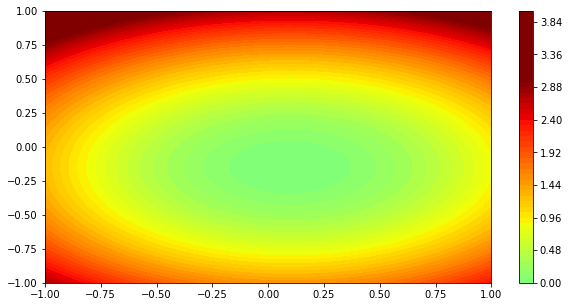

In [69]:
plot_2D(fit_hs, 3)

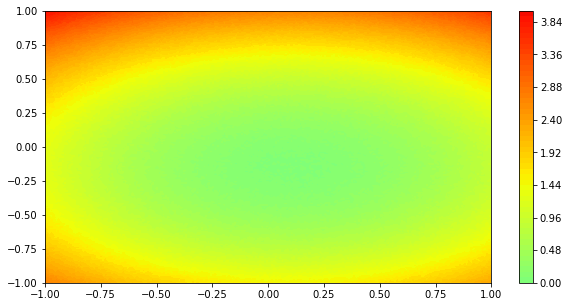

In [52]:
plot_2D(hs, 5)

In [53]:
fun(theta0)

array([[ 0.31128741,  0.31831633,  0.34358613, ...,  0.72299125,
         0.70980776,  0.725757  ],
       [ 0.31647173,  0.24623762,  0.25792331, ...,  0.66982149,
         0.67504512,  0.64385512],
       [ 0.30796559,  0.33052278,  0.31082054, ...,  0.66829115,
         0.72785387,  0.6685673 ],
       ...,
       [-0.89979206, -0.8843144 , -0.87887295, ..., -0.52538187,
        -0.5090321 , -0.45481333],
       [-0.92775262, -0.9407077 , -0.85776896, ..., -0.49288667,
        -0.54234632, -0.51880352],
       [-0.89175625, -0.94174441, -0.8650318 , ..., -0.51090742,
        -0.55195157, -0.55009346]])

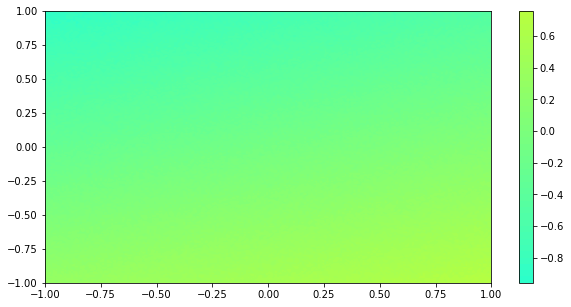

In [55]:
plot_2D(fun(theta0), 5)